# Programming Assignment 1: Implementing Basic SVM for Binary Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
iris=datasets.load_iris()

In [3]:
X=iris.data[iris.target != 2, :2]
y=iris.target[iris.target != 2]

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

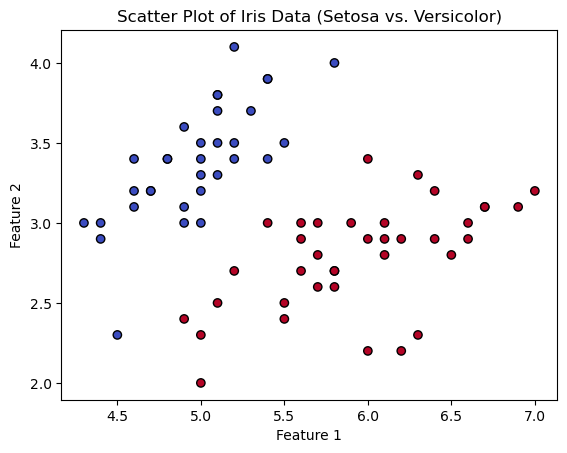

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Iris Data (Setosa vs. Versicolor)")
plt.show()

In [6]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
# Train the SVM model with a linear kernel

svm_clf=SVC(kernel="linear", C=1)
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

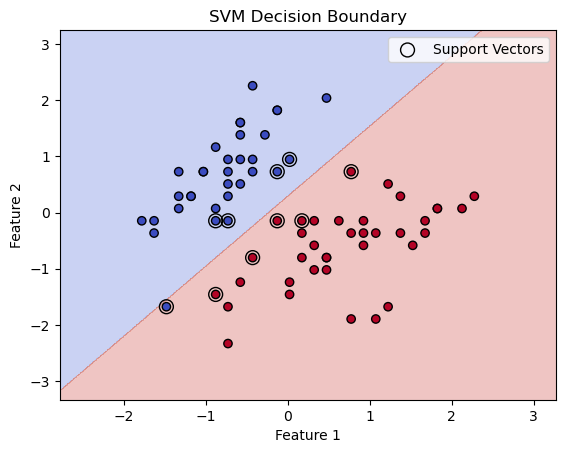

In [8]:
# Plot decision boundary

def plot_decision_boundary(X, y, model):
    x_min, x_max=X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max=X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k', label='Support Vectors')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, y_train, svm_clf)

In [9]:
y_pred=svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



C = 0.1


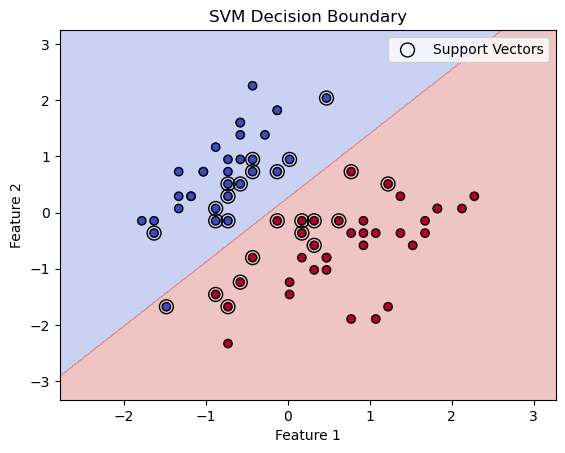


C = 1


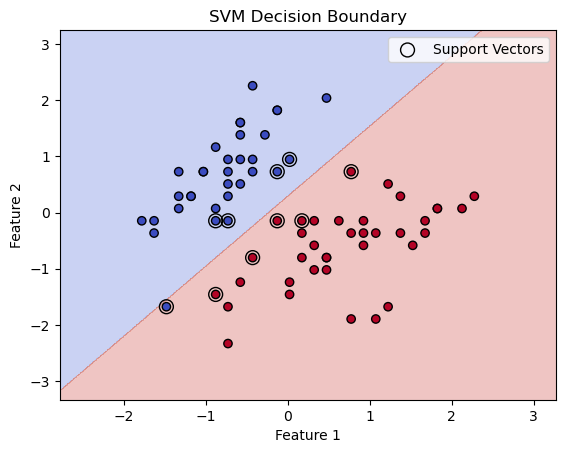


C = 10


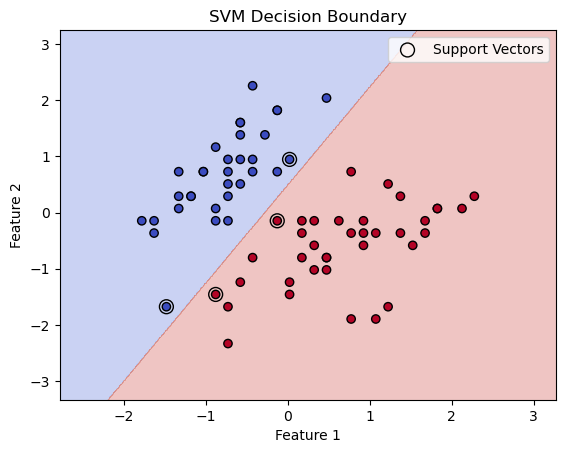

In [10]:
# Effect of the Regularization Parameter (C)

for C in [0.1, 1, 10]:
    svm_clf=SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    print(f"\nC = {C}")
    plot_decision_boundary(X_train, y_train, svm_clf)

# Programming Assignment 2: Exploring SVM Kernels for Non-linear Classification

In [11]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [12]:
# Creating a Non-linear Dataset

X, y=make_moons(n_samples=100, noise=0.2, random_state=42)

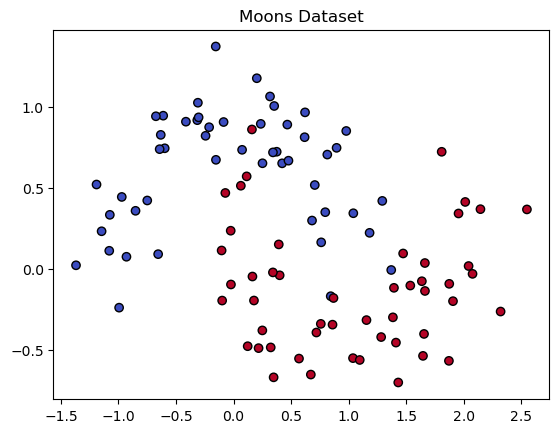

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Moons Dataset")
plt.show()


Kernel: linear


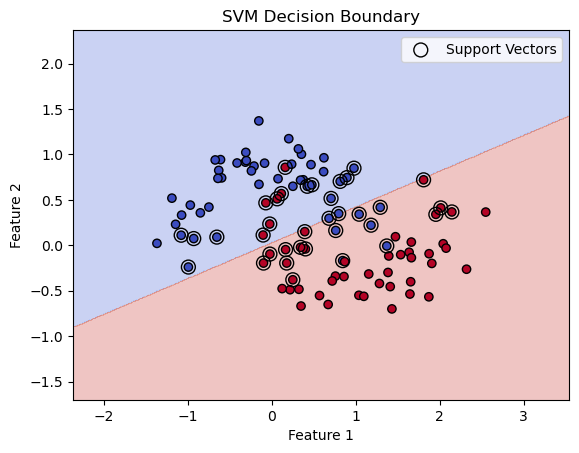


Kernel: poly, Degree: 2


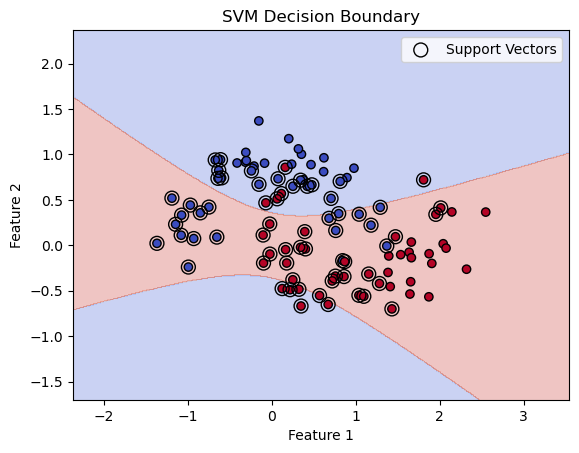


Kernel: poly, Degree: 3


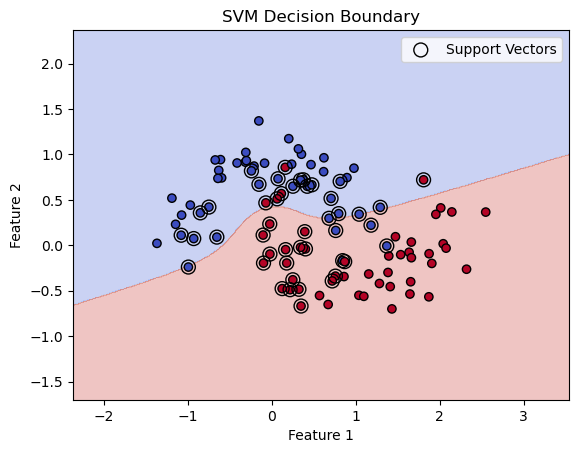


Kernel: rbf


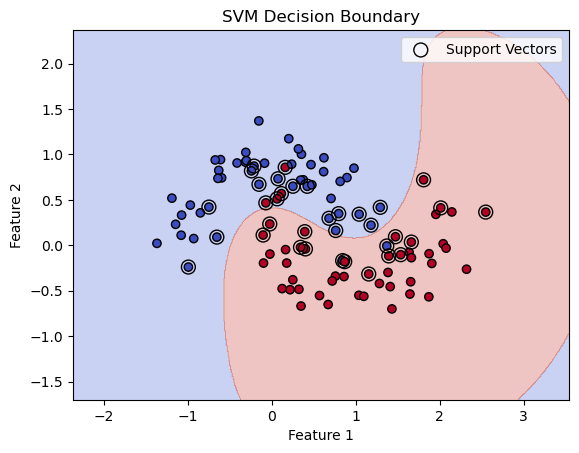

In [14]:
# 2. Applying Different SVM Kernels

kernels=['linear', 'poly', 'rbf']
for kernel in kernels:
    if kernel == 'poly':
        for degree in [2, 3]:
            svm_clf=SVC(kernel=kernel, degree=degree, C=1)
            svm_clf.fit(X, y)
            print(f"\nKernel: {kernel}, Degree: {degree}")
            plot_decision_boundary(X, y, svm_clf)
    else:
        svm_clf=SVC(kernel=kernel, gamma='scale', C=1)
        svm_clf.fit(X, y)
        print(f"\nKernel: {kernel}")
        plot_decision_boundary(X, y, svm_clf)


RBF Kernel, Gamma: 0.1


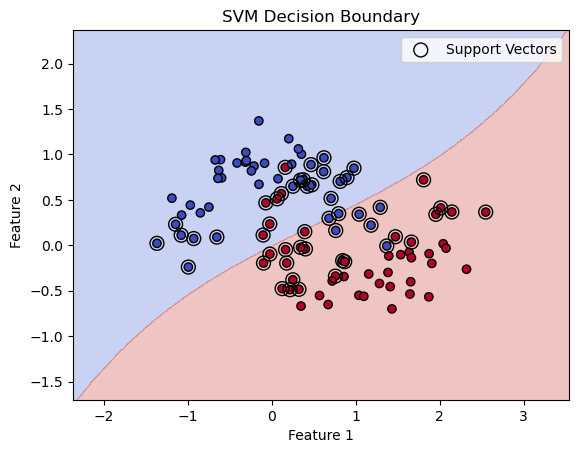


RBF Kernel, Gamma: 1


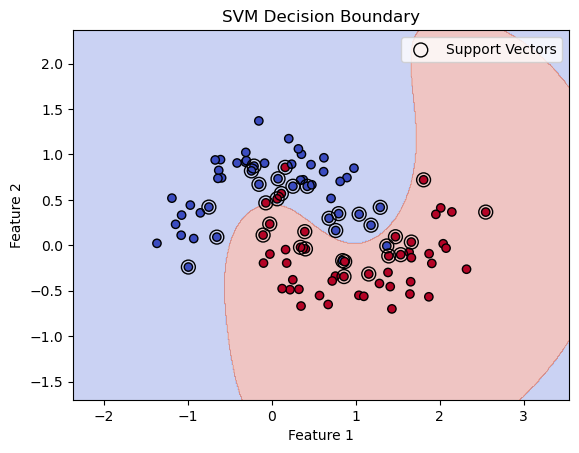


RBF Kernel, Gamma: 10


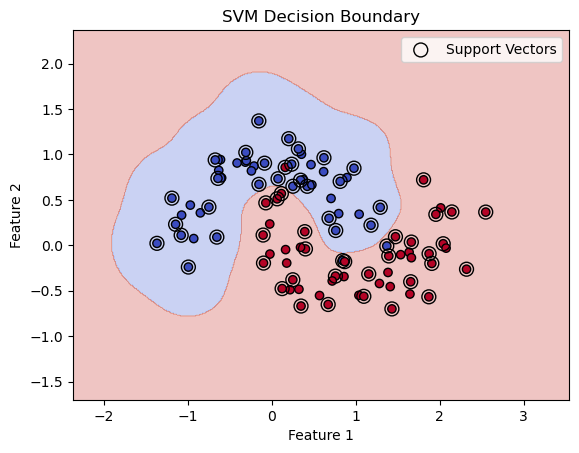

In [15]:
# Hyperparameter Tuning for RBF Kernel

for gamma in [0.1, 1, 10]:
    svm_clf=SVC(kernel='rbf', gamma=gamma, C=1)
    svm_clf.fit(X, y)
    print(f"\nRBF Kernel, Gamma: {gamma}")
    plot_decision_boundary(X, y, svm_clf)

In [16]:
# Model Comparison and Analysis

svm_rbf=SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X, y)
y_pred=svm_rbf.predict(X)
print("\nPerformance of RBF Kernel:")
print("Accuracy:", accuracy_score(y, y_pred))
print("F1 Score:", f1_score(y, y_pred))


Performance of RBF Kernel:
Accuracy: 0.94
F1 Score: 0.9387755102040817
